Steps to be followed:


1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

 

Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.

Please name your file in the following format - CourseName_ResidencyNumber_ProjectNo_Title.ipynb
For Ex - Ensemble Techniques_R3_Project1_Parkinson’s Disease.ipynb

In [214]:
#Import all the necessary modules
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from sklearn import metrics
import sklearn.metrics as mt
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

# 1. Load the dataset

#  2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
    

In [215]:
Parkin_df = pd.read_csv("parkinsons.data")
# Check the dataset shapes, no of columns and its data types
Parkin_df.shape , Parkin_df.columns ,Parkin_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

((195, 24),
 Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
        'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
        'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
        'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
        'spread1', 'spread2', 'D2', 'PPE'],
       dtype='object'),
 None)

In [216]:
# Explore the data 
Parkin_df.head(10)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [217]:
# explore the dependant feature data 
Parkin_df["status"].value_counts() 


1    147
0     48
Name: status, dtype: int64

In [218]:
Parkin_df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

(MDVP:Fo(Hz)         0.591737
 MDVP:Fhi(Hz)        2.542146
 MDVP:Flo(Hz)        1.217350
 MDVP:Jitter(%)      3.084946
 MDVP:Jitter(Abs)    2.649071
 MDVP:RAP            3.360708
 MDVP:PPQ            3.073892
 Jitter:DDP          3.362058
 MDVP:Shimmer        1.666480
 MDVP:Shimmer(dB)    1.999389
 Shimmer:APQ3        1.580576
 Shimmer:APQ5        1.798697
 MDVP:APQ            2.618047
 Shimmer:DDA         1.580618
 NHR                 4.220709
 HNR                -0.514317
 status             -1.187727
 RPDE               -0.143402
 DFA                -0.033214
 spread1             0.432139
 spread2             0.144430
 D2                  0.430384
 PPE                 0.797491
 dtype: float64, MDVP:Fo(Hz)         -0.627898
 MDVP:Fhi(Hz)         7.627241
 MDVP:Flo(Hz)         0.654615
 MDVP:Jitter(%)      12.030939
 MDVP:Jitter(Abs)    10.869043
 MDVP:RAP            14.213798
 MDVP:PPQ            11.963922
 Jitter:DDP          14.224762
 MDVP:Shimmer         3.238308
 MDVP:Shimmer(d

<Figure size 1152x720 with 0 Axes>

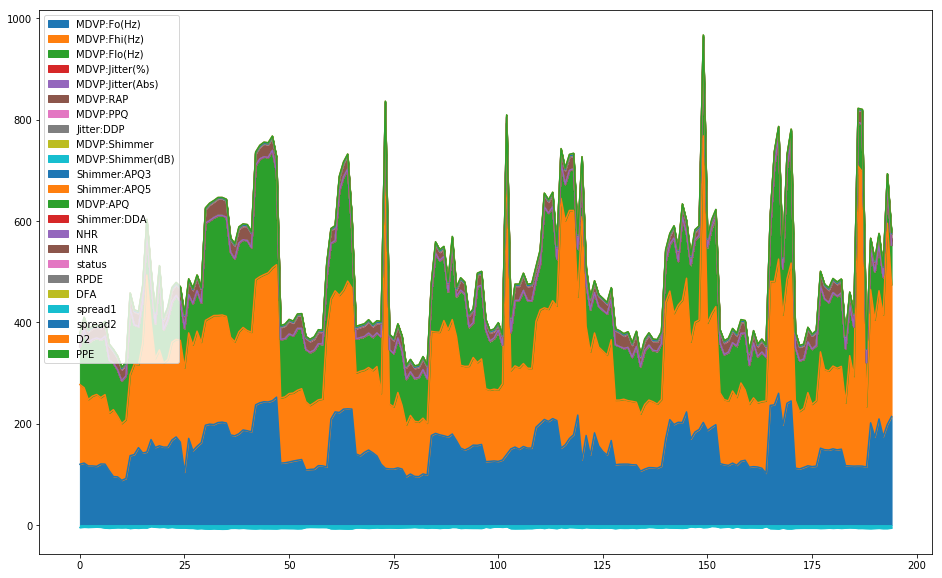

In [219]:
# Check distribution , Skew , Kurtosis and Univariate analysis
pyplot.figure(figsize=(16, 10))

Parkin_df.plot.area(figsize=(16, 10))

Parkin_df.skew() , Parkin_df.kurtosis()


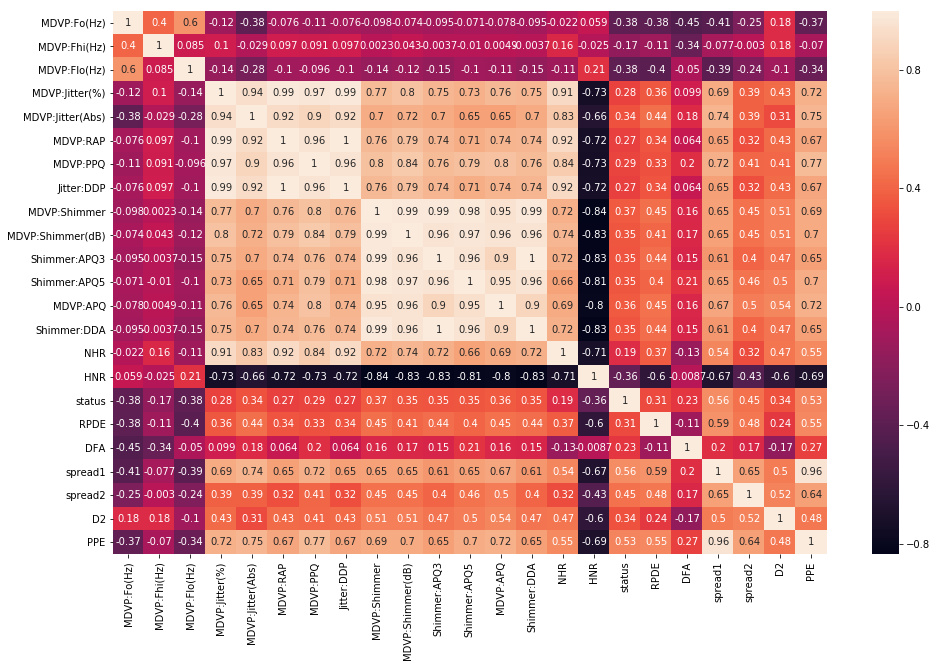

In [220]:
# bivariate Analysis using Correlation

pyplot.figure(figsize=(16, 10))

sns.heatmap(Parkin_df.corr(),annot=True)

In [221]:
# Check correlation of  features against the Status
Parkin_df[Parkin_df.columns[1:]].corr()['status']

#'MDVP:Jitter(Abs)','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','spread1','spread2','D2' are positively correlated with Status

MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
status              1.000000
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

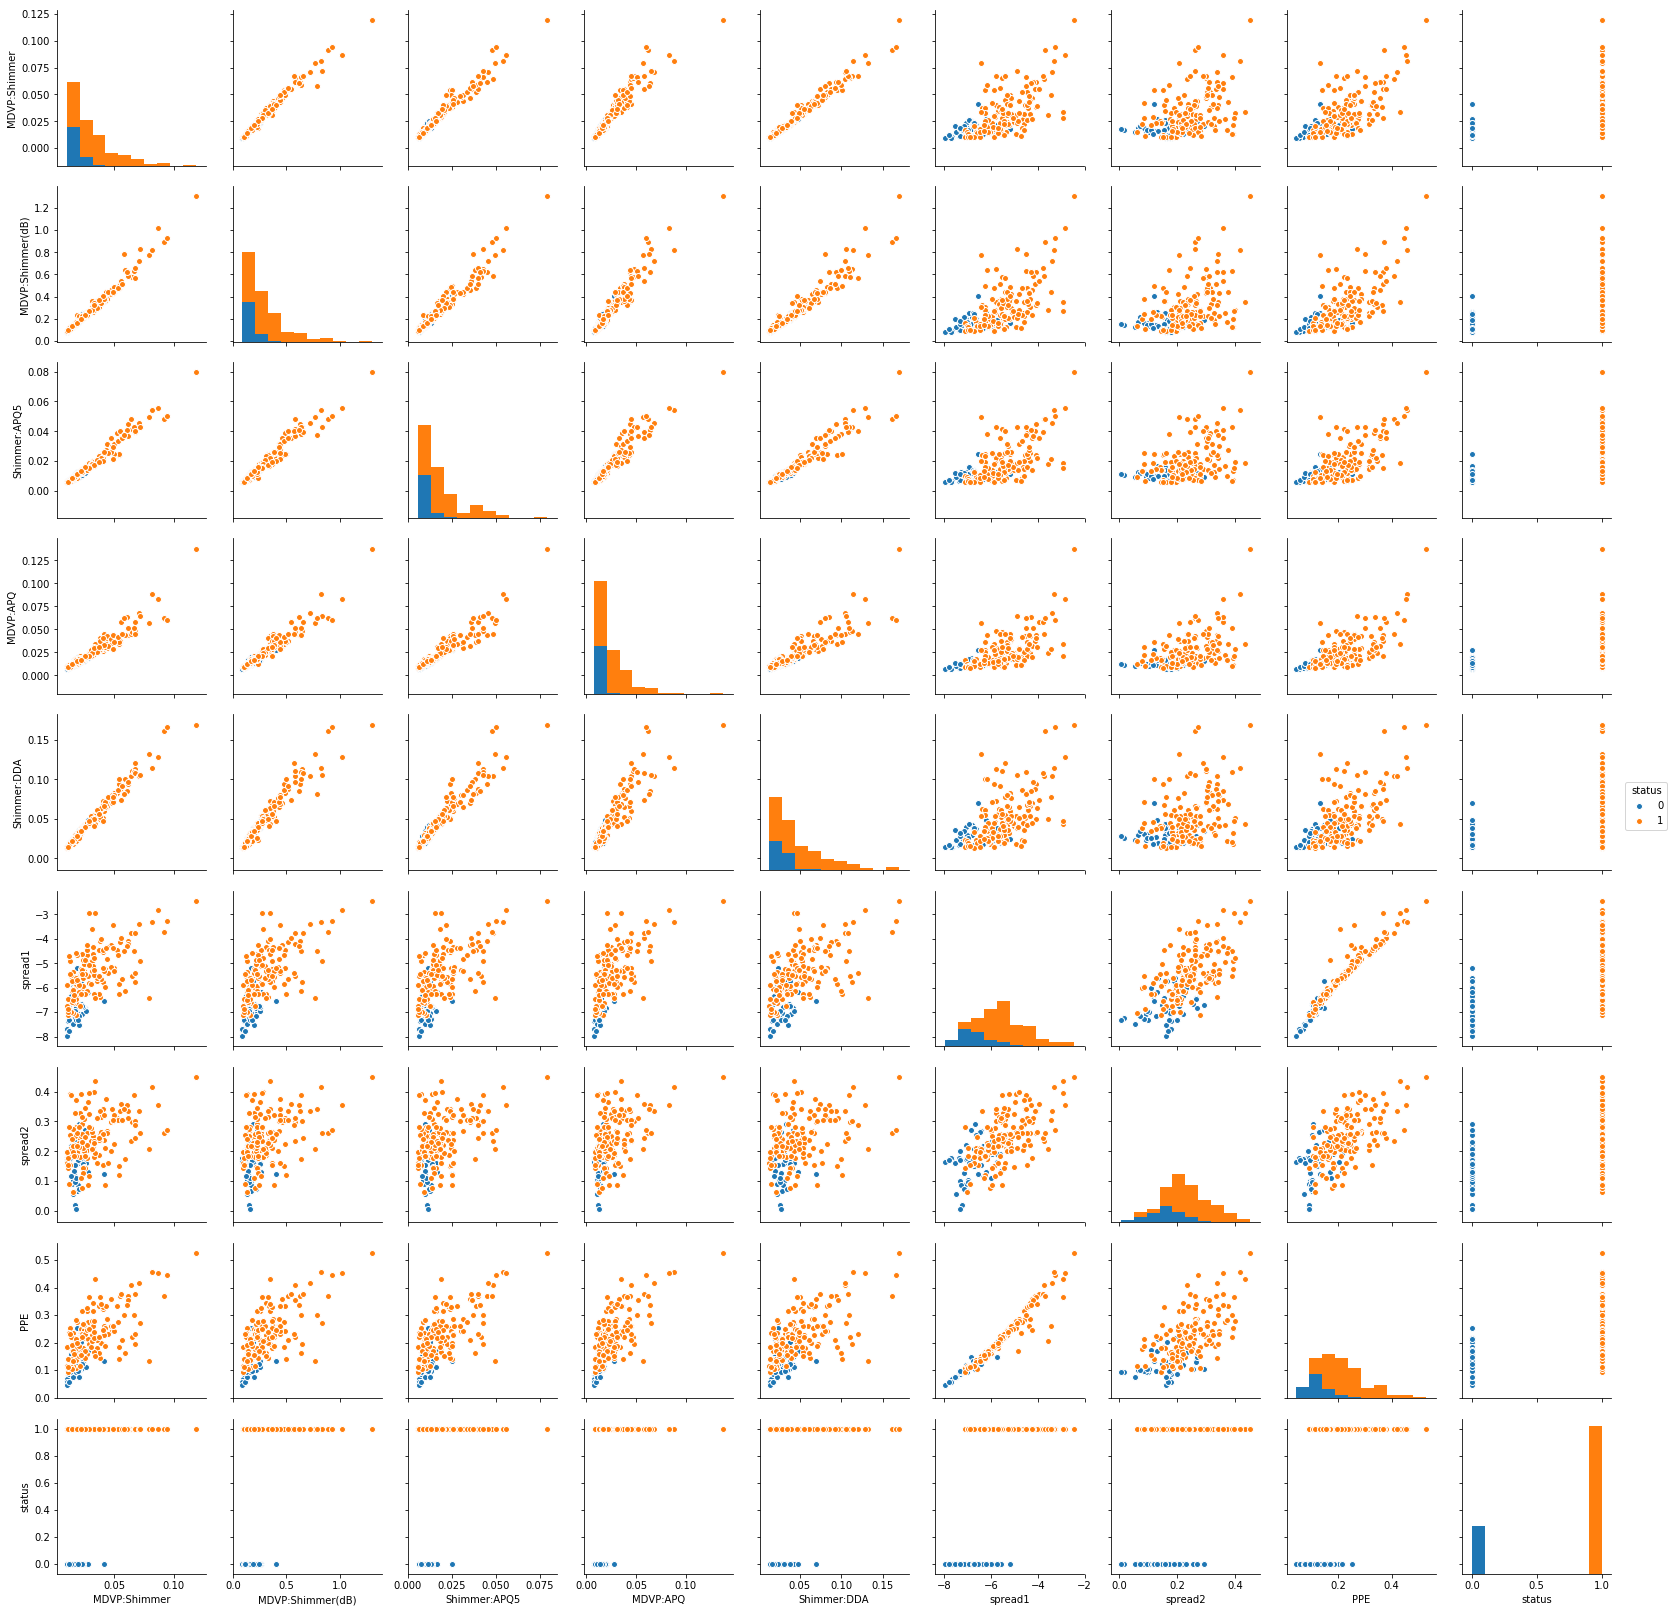

In [222]:
# Pair plot analysis of distribution

sns.pairplot(Parkin_df[['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','spread1','spread2','PPE','status']], hue = "status")

# 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [240]:
#X =Parkin_df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
#       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
#       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
#       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
#       'spread1', 'spread2', 'D2', 'PPE']]

# Adding features only which has correlation above 0.35

X =Parkin_df[['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','spread1','spread2','PPE']]

Y=Parkin_df['status']

#X = array[:,0:7] 
#Y = array[:,7]  
test_size = 0.3
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


# 5 . Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)                

In [241]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')

dt_model.fit(X_train, y_train)

#print(dt_model.feature_importances_) 

# Check the feature importance and remove the features which has 0 importance

dt_model.score(X_train , y_train) # Training data score

#dt_model.score(X_test , y_test) , dt_model.score(X_train , y_train)

1.0

# 6 Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [242]:
print(dt_model.score(X_test , y_test))

y_predict = dt_model.predict(X_test)

matrices = metrics.confusion_matrix(y_test, y_predict)

print(metrics.confusion_matrix(y_test, y_predict))

# Cross validate the score 
scores = cross_val_score(dt_model,X_test,y_test,cv=10,scoring='accuracy')

print("Average score of the DT algorithm against Test data ",scores.mean()) # to check the consistency of the accuracy score 



0.864406779661017
[[12  4]
 [ 4 39]]
Average score of the DT algorithm against Test data  0.8361904761904763


In [243]:
# Analyze the confusion matrix

print("True Positive (TP) : Observation is positive, and is predicted to be positive", matrices[0][0])
print("False Negative (FN) : Observation is positive, but predicted negative.", matrices[0][1])
print("False Positive (FP) : Observation is negative, but predicted positive.",matrices[1][0])
print("True Negative (TN)  : Observation is negative, and predicted to be negative",matrices[1][1])


True Positive (TP) : Observation is positive, and is predicted to be positive 12
False Negative (FN) : Observation is positive, but predicted negative. 4
False Positive (FP) : Observation is negative, but predicted positive. 4
True Negative (TN)  : Observation is negative, and predicted to be negative 39


# 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

In [244]:
dt_model_reg = DecisionTreeClassifier(criterion = 'entropy',random_state=50, max_depth = 20,min_samples_leaf=5,max_leaf_nodes=20)

dt_model_reg.fit(X_train, y_train)

print(dt_model_reg.score(X_train , y_train) ,dt_model_reg.score(X_test , y_test))

y_predict = dt_model_reg.predict(X_test)

print(metrics.confusion_matrix(y_test, y_predict))

#mt.matthews_corrcoef(y_test,y_predict)

tree.export_graphviz(dt_model_reg, out_file="tree.dot")

0.9191176470588235 0.8983050847457628
[[13  3]
 [ 3 40]]


# Regularization helped the model to increase the prediction score

# Max depth, Max leaf nodes and min sample leaf helped in regularization

# 8.Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [245]:
from sklearn.ensemble import RandomForestClassifier
estimat =100
rfcl = RandomForestClassifier(n_estimators = estimat,max_features=6)
rfcl = rfcl.fit(X_train, y_train)

print(rfcl.score(X_train , y_train))

y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

scores = cross_val_score(rfcl,X_test,y_test,cv=10,scoring='accuracy')

print(scores.mean())

#mt.matthews_corrcoef(y_test,y_predict)

1.0
0.9322033898305084
[[12  4]
 [ 0 43]]
0.8838095238095238


In [246]:
print("Optimal no of trees is ",estimat," RF reduced the # of false negatives")

Optimal no of trees is  100  RF reduced the # of false negatives


In [247]:
# Trying algorithm with all the features just to see how the scores are 

# feature names
features = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE","status"]
array = Parkin_df[features].values

# do preprocessing

scaler = MinMaxScaler(feature_range=(0,22))
scaled = scaler.fit_transform(array)

# X stores feature values
X_full = scaled[:,0:22]
# Y stores Status
Y_full = scaled[:,22]

validation_size = 0.3
# randomize which part of the data is training and which part is validation
seed = 7
# split dataset into training set (70%) and validation set (30%)
X_Ftrain, X_Fvalidation, Y_Ftrain, Y_Fvalidation = cross_validation.train_test_split(X_full, Y_full, test_size = validation_size, random_state = seed)


num_folds = 10
num_instances = len(X_Fvalidation)
seed = 7
# use the 'accuracy' metric to evaluate models (correct / total)
scoring = 'accuracy'

# algorithms / models
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('rfcl', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier(n_estimators=100)))

# evaluate each algorithm / model
results = []
names = []
print("Scores for each algorithm:")
for name, model in models:
    kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_Ftrain, Y_Ftrain, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    model.fit(X_Ftrain, Y_Ftrain)
    predictions = model.predict(X_Fvalidation)
    print(name, accuracy_score(Y_Fvalidation, predictions)*100)
    #print(mt.matthews_corrcoef(Y_Fvalidation, predictions))
    print()
   

Scores for each algorithm:
DT 89.83050847457628

rfcl 89.83050847457628

GB 94.91525423728814

